In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
agriculture = pd.read_excel("agriculture_percent_of_gdp.xlsx")
trade=pd.read_excel("trade.xlsx")
gini=pd.read_excel("gini.xlsx")

## **Introdução:**
### MERCOSUL


   O Mercosul ou Mercado Comum do Sul, é um bloco econômico que foi criado em 1991. Ele é configurado como uma união aduaneira no qual existe um livre comércio e certos privilégios para os países participantes. Estes são a Argentina, Brasil, Paraguai, Uruguai e a atualmente suspensa, desde 2016, a Venezuela. Também existem os países associados do bloco, sendo eles a Bolivia, Chile, Perú, Colômbia, Equador, Guiana e Suriname, e também aqueles que são observadores, o México e a Nova Zelândia.
   A grande diferença entre membro associado e pleno é que o associado não adota a tarifa externa comum (TEC) que caracteriza a união aduaneira, ou seja, não tem uma tarifa única para importações vindas do mercado externo ao bloco. Além disso os associados tem uma baixa ou quase inexistente tarifa sobre comércio de bens dentro do bloco. Os membros plenos tem uma tarifa 90% menor do que aos paises não plenos, em relação ao comercio de bens fabriados dentro do bloco.
   Já um membro observador, apenas participa das reuniões e encontros do bloco, no sentido de melhor acompanhar o andamento das discussões, mas sem poder de participação ou voto.

## **Pergunta de pesquisa:**
### Comparação países da America do Sul que são membors plenos do Mercosul em relação à paises fora do bloco.
- Países do Mercosul passam a ter uma diminuição ou um aumento da agricultura em comparação com os outros paises da America do Sul?
- Desde a criação do Mercosul em 1991, o indice GINI destes paises melhoraram?
- O comércio apresentou diferença significante nos fundos monetários do bloco?

## Mecanismo e Hipótese:

Será feito uma análise exploratória de 3 variáveis de dados coletados em 2000 e em 2010. A comparação será feita de países da América do Sul pertencentes ao bloco econõmico Mercosul ou não. 
Assim, a partir das perguntas, uma hipótese a ser feita é que os paises da America do Sul pertencentes ao Mercosul terão um aumento considerável do comércio interno e externo. Já em relação a agricultura, dependendo do potencial agricultor de cada pais, este pode ter um grande aumento da produçao ou uma grande diminuicao devido a facilidade de ciruclacao de bens. Ja em relacao ao indice GINI, que demonstra o quao desigual é um pais em questoes economicas e sociais, tambem tende a melhorar. Porém, isto é muito dificil dizer isso a curto prazo, já que tambem mutos fatores influenciam a desigualdade além do alcance do Mercosul.

## **Desenvolvimento**:
https://www.gapminder.org/data/

Sobre as variáveis:
- Agricultura: inclui silvicultura, pescaria, pecuária e distintos cultivos. O valor agregado é o resultado liquido obtido a partir da soma de todos as entradas e saídas na produção. Fonte: ISIC
- índice GINI: É a representacao por meio de um número que mede a ditribuição de renda da população. Assim ele nos demonstra a desigualdade social de um país sendo que quanto mais próximo de 0, menos desiguladade há e por contrário, quanto mais próximo de 100 mais desigualdade há. Fonte: The World Bank
- Comércio: Em milhões de dollares, é a diferença entre a exportação pela importação. Fonte: World Trade Organization

# -2000

In [4]:
agric_2000=agriculture.loc[:, ["country", 2000]]
trade_2000=trade.loc[:, ["country", 2000]]
gini_2000=gini.loc[:, ["country", 2000]]

In [5]:
agric2000_idx = agric_2000.set_index('country')
trade2000_idx = trade_2000.set_index('country')
gini2000_idx = gini_2000.set_index('country')

In [6]:
quase_junto2000= agric2000_idx.join(trade2000_idx, how='inner', lsuffix=': Agricultura', rsuffix=': Comércio')
junto2000=quase_junto2000.join(gini2000_idx,how="inner")
junto2000.rename(columns={2000:"2000: GINI"},inplace=True)


### Adicionando variável qualitativa:##

In [7]:
junto2000["America_do_Sul"]="Não"
junto2000.loc["Argentina","America_do_Sul"]="Sim"
junto2000.loc["Brazil","America_do_Sul"]="Sim"
junto2000.loc["Paraguay","America_do_Sul"]="Sim"
junto2000.loc["Uruguay","America_do_Sul"]="Sim"
junto2000.loc["Colombia","America_do_Sul"]="Sim"
junto2000.loc["Peru","America_do_Sul"]="Sim"
junto2000.loc["Venezuela","America_do_Sul"]="Sim"
junto2000.loc["Chile","America_do_Sul"]="Sim"
junto2000.loc["Bolivia","America_do_Sul"]="Sim"
junto2000.loc["Suriname","America_do_Sul"]="Sim"
junto2000.loc["Ecuador","America_do_Sul"]="Sim"
junto2000.loc["Guyana","America_do_Sul"]="Sim"

junto2000["Membro_Mercosul"]="Não"
junto2000.loc["Argentina","Membro_Mercosul"]="Sim"
junto2000.loc["Brazil","Membro_Mercosul"]="Sim"
junto2000.loc["Paraguay","Membro_Mercosul"]="Sim"
junto2000.loc["Uruguay","Membro_Mercosul"]="Sim"

In [8]:
Analise2000=junto2000[junto2000.America_do_Sul=="Sim"]
Analise2000

,2000: Agricultura,2000: Comércio,2000: GINI,America_do_Sul,Membro_Mercosul
country,,,,,
Argentina,4.68,-1.850000e+09,51.7,Sim,Sim
Bolivia,13.00,-7.600000e+08,58.9,Sim,Não
Brazil,4.75,-1.480000e+10,58.8,Sim,Sim
Chile,5.38,1.360000e+09,53.3,Sim,Não
Colombia,8.31,-8.360000e+08,57.7,Sim,Não
Ecuador,15.40,8.780000e+08,54.9,Sim,Não
Guyana,25.80,-1.040000e+08,43.5,Sim,Não
Paraguay,14.70,7.040000e+08,55.2,Sim,Sim
Peru,8.07,-1.040000e+09,53.4,Sim,Não


# -2010

In [9]:
agric_2010=agriculture.loc[:, ["country", 2010]]
trade_2010=trade.loc[:, ["country", 2010]]
gini_2010=gini.loc[:, ["country", 2010]]

In [10]:
agric2010_idx = agric_2010.set_index('country')
trade2010_idx = trade_2010.set_index('country')
gini2010_idx = gini_2010.set_index('country')

In [11]:
quase_junto2010= agric2010_idx.join(trade2010_idx, how='inner', lsuffix=': Agricultura', rsuffix=': Comércio')
junto2010=quase_junto2010.join(gini2010_idx,how="inner")
junto2010.rename(columns={2010:"2010: GINI"},inplace=True)

### Adicionando variável qualitativa:##

In [12]:
junto2010["America_do_Sul"]="Não"
junto2010.loc["Argentina","America_do_Sul"]="Sim"
junto2010.loc["Brazil","America_do_Sul"]="Sim"
junto2010.loc["Paraguay","America_do_Sul"]="Sim"
junto2010.loc["Uruguay","America_do_Sul"]="Sim"
junto2010.loc["Colombia","America_do_Sul"]="Sim"
junto2010.loc["Peru","America_do_Sul"]="Sim"
junto2010.loc["Venezuela","America_do_Sul"]="Sim"
junto2010.loc["Chile","America_do_Sul"]="Sim"
junto2010.loc["Bolivia","America_do_Sul"]="Sim"
junto2010.loc["Suriname","America_do_Sul"]="Sim"
junto2010.loc["Ecuador","America_do_Sul"]="Sim"
junto2010.loc["Guyana","America_do_Sul"]="Sim"

junto2010["Membro_Mercosul"]="Não"
junto2010.loc["Argentina","Membro_Mercosul"]="Sim"
junto2010.loc["Brazil","Membro_Mercosul"]="Sim"
junto2010.loc["Paraguay","Membro_Mercosul"]="Sim"
junto2010.loc["Uruguay","Membro_Mercosul"]="Sim"

In [13]:
Analise2010=junto2010[junto2010.America_do_Sul=="Sim"]
Analise2010

,2010: Agricultura,2010: Comércio,2010: GINI,America_do_Sul,Membro_Mercosul
country,,,,,
Argentina,7.13,1.230000e+10,43.0,Sim,Sim
Bolivia,10.40,1.350000e+09,48.1,Sim,Não
Brazil,4.12,2.000000e+10,53.3,Sim,Sim
Chile,3.62,1.400000e+10,48.2,Sim,Não
Colombia,6.50,-5.250000e+09,54.2,Sim,Não
Ecuador,9.73,-3.140000e+09,47.8,Sim,Não
Guyana,16.40,-6.300000e+08,43.2,Sim,Não
Paraguay,20.40,7.230000e+08,50.2,Sim,Sim
Peru,6.83,5.870000e+09,46.1,Sim,Não


# Análise

Grafico de barras que repreenta países que pertencem ao Mercosul na América do Sul.

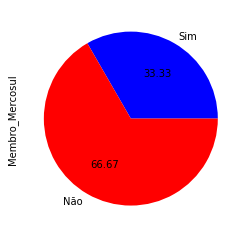

In [14]:
geral = Analise2000["Membro_Mercosul"].value_counts().reindex(["Sim",  "Não"])
geral.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)
plt.show()


## Agricultura em 2000 e 2010:


Comparando as médias em 2000 e 2010 dos países pertences ou não do Mercosul:

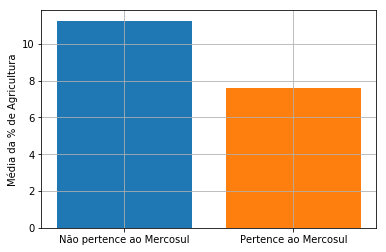

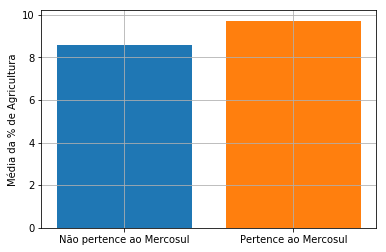

In [15]:
Não_Merco_2000=Analise2000.loc[Analise2000.Membro_Mercosul=="Não"]
Sim_Merco_2000=Analise2000.loc[Analise2000.Membro_Mercosul=="Sim"]
Não_Merco_2010=Analise2010.loc[Analise2010.Membro_Mercosul=="Não"]
Sim_Merco_2010=Analise2010.loc[Analise2010.Membro_Mercosul=="Sim"]

#2000
agric1 = Não_Merco_2000["2000: Agricultura"].mean()
agric2 = Sim_Merco_2000["2000: Agricultura"].mean()


plt.bar("Não pertence ao Mercosul", agric1)
plt.bar("Pertence ao Mercosul", agric2)
plt.ylabel("Média da % de Agricultura")
plt.grid()
plt.show()

#2010

agric11 = Não_Merco_2010["2010: Agricultura"].mean()
agric22 = Sim_Merco_2010["2010: Agricultura"].mean()


plt.bar("Não pertence ao Mercosul", agric11)
plt.bar("Pertence ao Mercosul", agric22)
plt.ylabel("Média da % de Agricultura")
plt.grid()
plt.show()





Analisando em 2000, além das médias, a mudança na agricultura através de faixas:

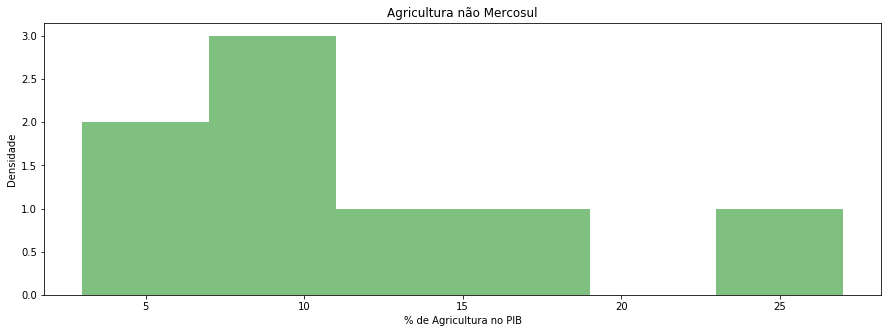

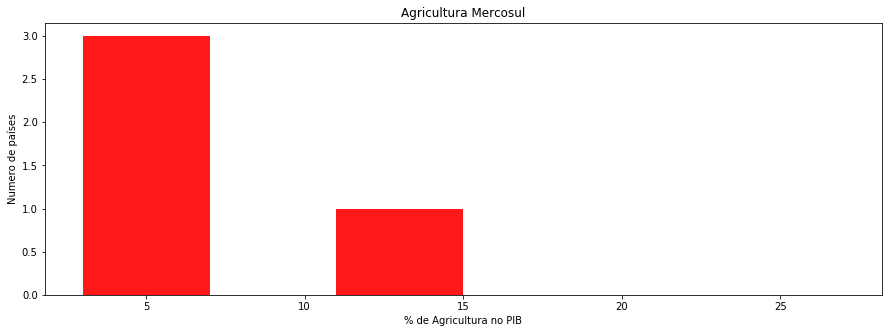

In [16]:
Sim_Merco_2000.describe()
faixaAgric_N_2000=range(3,30,4)
faixaAgric_S_2000=range(3,30,4)

Agric2000_faixaN=pd.cut(Não_Merco_2000["2000: Agricultura"],faixaAgric_N_2000,False)
Agric2000_faixaN.value_counts()

Agric2000_faixaS=pd.cut(Sim_Merco_2000["2000: Agricultura"],faixaAgric_S_2000,False)
Agric2000_faixaS.value_counts()

fig = plt.figure(figsize=(15, 5))

plot = Não_Merco_2000["2000: Agricultura"].plot.hist(bins=faixaAgric_N_2000,title='Agricultura não Mercosul', density=False, color='green', alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('% de Agricultura no PIB')
plt.show()

fig = plt.figure(figsize=(15, 5))
plot = Sim_Merco_2000["2000: Agricultura"].plot.hist(bins=faixaAgric_S_2000,title='Agricultura Mercosul', density=False, color='red', alpha=0.9)
plt.ylabel('Numero de países')
plt.xlabel('% de Agricultura no PIB')
plt.show()

Analisando em 2010, além das médias, a mudança na agricultura através de faixas:

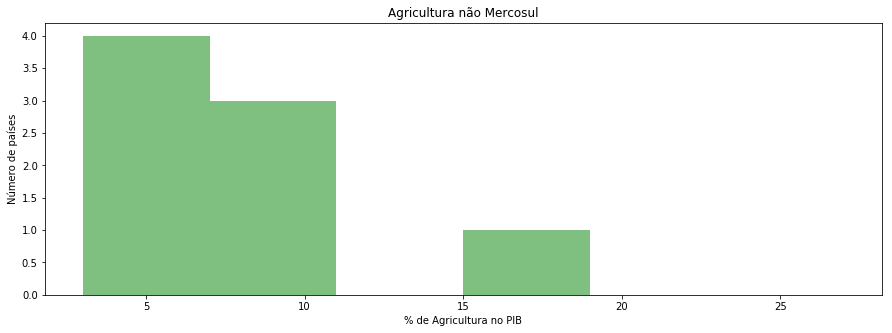

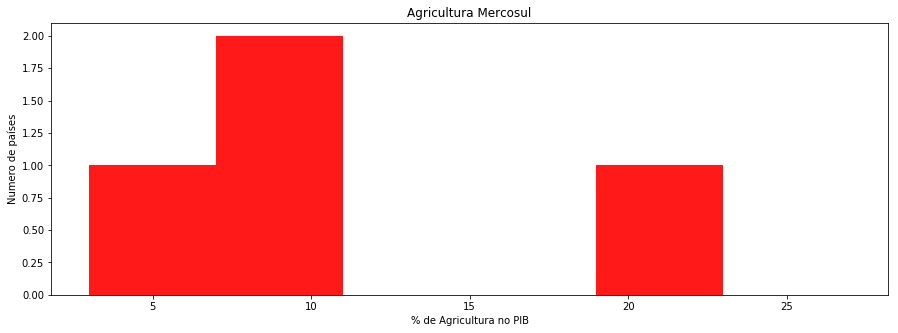

In [17]:
Sim_Merco_2010.describe()
faixaAgric_N_2010=range(3,30,4)
faixaAgric_S_2010=range(3,30,4)

Agric2010_faixaN=pd.cut(Não_Merco_2010["2010: Agricultura"],faixaAgric_N_2010,False)
Agric2010_faixaN.value_counts()

Agric2010_faixaS=pd.cut(Sim_Merco_2010["2010: Agricultura"],faixaAgric_S_2010,False)
Agric2010_faixaS.value_counts()

fig = plt.figure(figsize=(15, 5))

plot = Não_Merco_2010["2010: Agricultura"].plot.hist(bins=faixaAgric_N_2010,title='Agricultura não Mercosul', density=False, color='green', alpha=0.5)
plt.ylabel('Número de países')
plt.xlabel('% de Agricultura no PIB')
plt.show()

fig = plt.figure(figsize=(15, 5))
plot = Sim_Merco_2010["2010: Agricultura"].plot.hist(bins=faixaAgric_S_2010,title='Agricultura Mercosul', density=False, color='red', alpha=0.9)
plt.ylabel('Numero de países')
plt.xlabel('% de Agricultura no PIB')
plt.show()

Analisando, cada país especificamente, suas mudanças na agricultura.

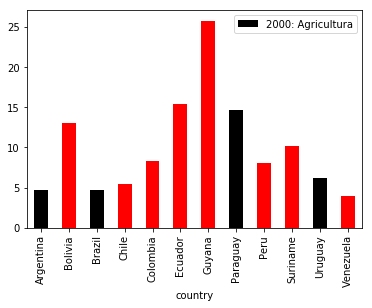

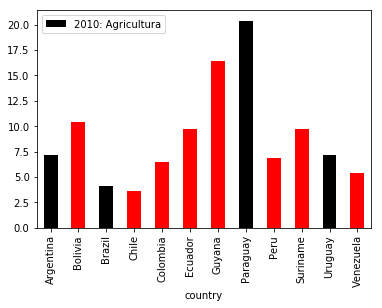

In [18]:
Analise2000.plot.bar(x=None,y="2000: Agricultura", color=['black', 'red', 'black', 'red', 'red', 'red', 'red', 'black', 'red','red','black','red'])
Analise2010.plot.bar(x=None,y="2010: Agricultura", color=['black', 'red', 'black', 'red', 'red', 'red', 'red', 'black', 'red','red','black','red'])
plt.show()

## Índice Gini em 2000 e 2010:

Comparando as médias em 2000 e 2010 dos países pertences ou não do Mercosul:

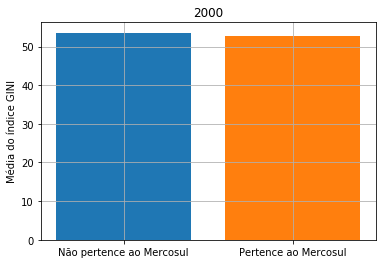

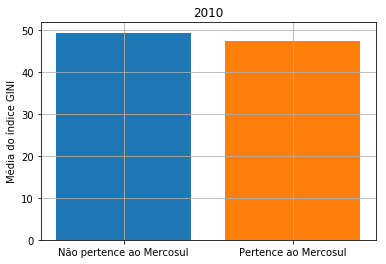

In [19]:
Não_Merco_2000=Analise2000.loc[Analise2000.Membro_Mercosul=="Não"]
Sim_Merco_2000=Analise2000.loc[Analise2000.Membro_Mercosul=="Sim"]
Não_Merco_2010=Analise2010.loc[Analise2010.Membro_Mercosul=="Não"]
Sim_Merco_2010=Analise2010.loc[Analise2010.Membro_Mercosul=="Sim"]

#2000

Gini1 = Não_Merco_2000["2000: GINI"].mean()
Gini2 = Sim_Merco_2000["2000: GINI"].mean()

plt.bar("Não pertence ao Mercosul", Gini1)
plt.bar("Pertence ao Mercosul", Gini2)
plt.title("2000")
plt.ylabel("Média do índice GINI")
plt.grid()
plt.show()

#2010

Gini11 = Não_Merco_2010["2010: GINI"].mean()
Gini22 = Sim_Merco_2010["2010: GINI"].mean()

plt.bar("Não pertence ao Mercosul", Gini11)
plt.bar("Pertence ao Mercosul", Gini22)
plt.title("2010")
plt.ylabel("Média do índice GINI")
plt.grid()
plt.show()




Analisando, cada país especificamente, suas mudanças no índice GINI.

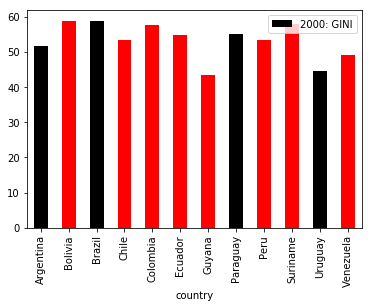

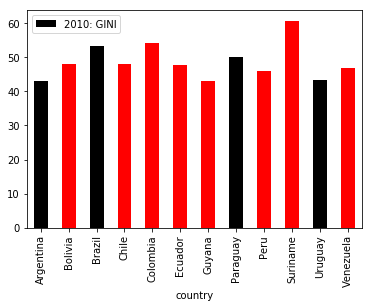

In [20]:
Analise2000.plot.bar(x=None,y="2000: GINI", color=['black', 'red', 'black', 'red', 'red', 'red', 'red', 'black', 'red','red','black','red'])
Analise2010.plot.bar(x=None,y="2010: GINI", color=['black', 'red', 'black', 'red', 'red', 'red', 'red', 'black', 'red','red','black','red'])
plt.show()

## Comércio em 2000 e 2010:

Comparando as médias em 2000 e 2010 dos países pertences ou não do Mercosul:

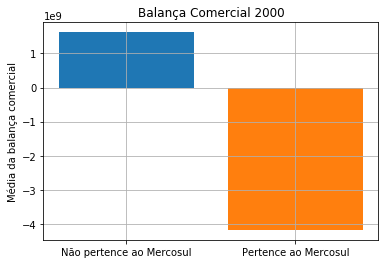

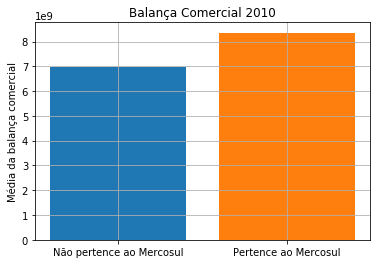

In [21]:
Não_Merco_2000=Analise2000.loc[Analise2000.Membro_Mercosul=="Não"]
Sim_Merco_2000=Analise2000.loc[Analise2000.Membro_Mercosul=="Sim"]
Não_Merco_2010=Analise2010.loc[Analise2010.Membro_Mercosul=="Não"]
Sim_Merco_2010=Analise2010.loc[Analise2010.Membro_Mercosul=="Sim"]

#2000

Comerc1 = Não_Merco_2000["2000: Comércio"].mean()
Comerc2 = Sim_Merco_2000["2000: Comércio"].mean()

plt.bar("Não pertence ao Mercosul", Comerc1)
plt.bar("Pertence ao Mercosul", Comerc2)
plt.ylabel("Média da balança comercial")
plt.title("Balança Comercial 2000")
plt.grid()
plt.show()

#2010
Comerc11 = Não_Merco_2010["2010: Comércio"].mean()
Comerc22 = Sim_Merco_2010["2010: Comércio"].mean()

plt.bar("Não pertence ao Mercosul", Comerc11)
plt.bar("Pertence ao Mercosul", Comerc22)
plt.title("Balança Comercial 2010")
plt.ylabel("Média da balança comercial")
plt.grid()
plt.show()


Analisando em 2000 e 2010, além das médias, a mudança na balança comercial através de faixas:

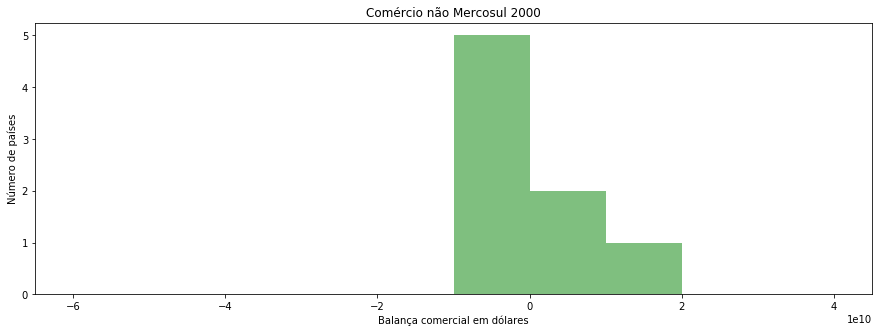

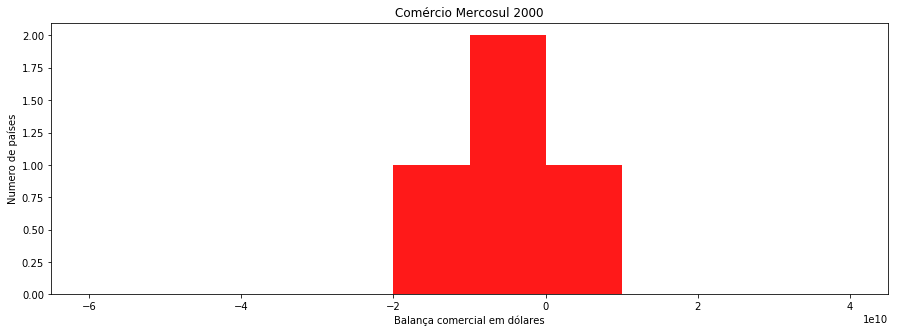

In [22]:

faixaComer_N_2000=range(-6*10**10,5*10**10,1*10**10)
faixaComer_S_2000=range(-6*10**10,5*10**10,1*10**10)

Comer2000_faixaN=pd.cut(Não_Merco_2000["2000: Comércio"],faixaComer_N_2000,False)
Comer2000_faixaN.value_counts()

Comer2000_faixaS=pd.cut(Sim_Merco_2000["2000: Comércio"],faixaComer_S_2000,False)
Comer2000_faixaS.value_counts()

fig = plt.figure(figsize=(15, 5))

plot = Não_Merco_2000["2000: Comércio"].plot.hist(bins=faixaComer_N_2000,title='Comércio não Mercosul 2000', density=False, color='green', alpha=0.5)
plt.ylabel('Número de países')
plt.xlabel('Balança comercial em dólares')
plt.show()

fig = plt.figure(figsize=(15, 5))
plot = Sim_Merco_2000["2000: Comércio"].plot.hist(bins=faixaComer_S_2000,title='Comércio Mercosul 2000', density=False, color='red', alpha=0.9)
plt.ylabel('Numero de países')
plt.xlabel('Balança comercial em dólares')
plt.show()

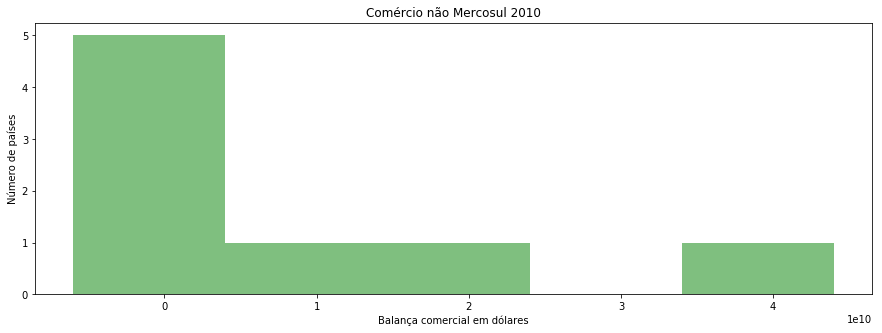

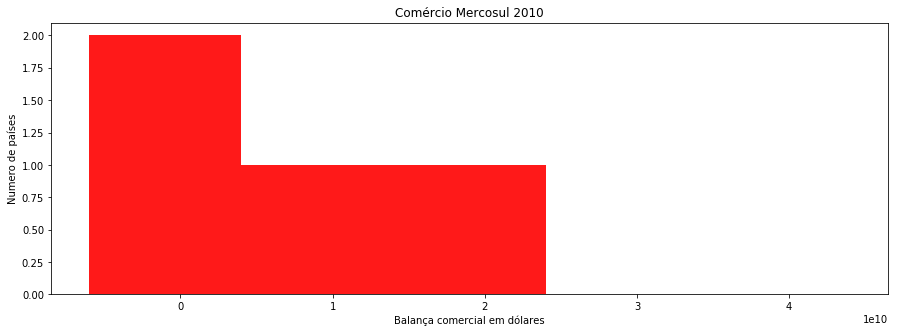

In [23]:

faixaComer_N_2010=range(-6*10**9,5*10**10,1*10**10)
faixaComer_S_2010=range(-6*10**9,5*10**10,1*10**10)

Comer2010_faixaN=pd.cut(Não_Merco_2010["2010: Comércio"],faixaComer_N_2010,False)
Comer2010_faixaN.value_counts()

Comer2010_faixaS=pd.cut(Sim_Merco_2010["2010: Comércio"],faixaComer_S_2010,False)
Comer2010_faixaS.value_counts()

fig = plt.figure(figsize=(15, 5))

plot = Não_Merco_2010["2010: Comércio"].plot.hist(bins=faixaComer_N_2010,title='Comércio não Mercosul 2010', density=False, color='green', alpha=0.5)
plt.ylabel('Número de países')
plt.xlabel('Balança comercial em dólares')
plt.show()

fig = plt.figure(figsize=(15, 5))
plot = Sim_Merco_2010["2010: Comércio"].plot.hist(bins=faixaComer_S_2010,title='Comércio Mercosul 2010', density=False, color='red', alpha=0.9)
plt.ylabel('Numero de países')
plt.xlabel('Balança comercial em dólares')
plt.show()

Analisando em 2010, além das médias, a mudança na agricultura através de faixas:

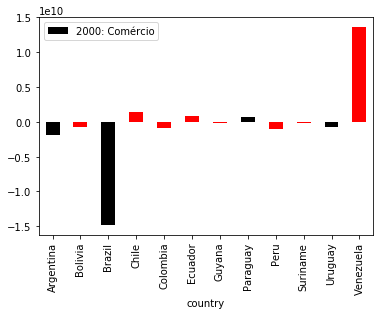

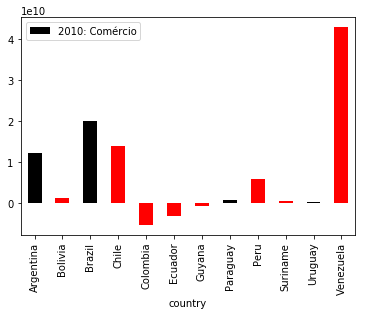

In [24]:
Analise2000.plot.bar(x=None,y="2000: Comércio", color=['black', 'red', 'black', 'red', 'red', 'red', 'red', 'black', 'red','red','black','red'])
Analise2010.plot.bar(x=None,y="2010: Comércio", color=['black', 'red', 'black', 'red', 'red', 'red', 'red', 'black', 'red','red','black','red'])
plt.show()

## Relação Comércio-Agricultura


In [26]:
Analise2000.plot.scatter(Analise2000["2000: Agricultura"], Analise2000["2000: Comércio"])

KeyError: '[ 4.68 13.    4.75  5.38  8.31 15.4  25.8  14.7   8.07 10.2   6.2   3.93] not in index'

# Conclusão

### - Agricultura


A hipótese da agricultura é uma questão controversa. Á medida que tarifas (como a TEC) entre o Mercosul caem, um país pode passar a produzir mais para suprir os outros países, ou até passar a produzir menos, pois fica mais barato comprar do que produzir, à medida que cada país tem seu potencial agricultor.

Analisando os primeiros gráficos de barras que representa a média da % da agricultura influente no PIB, com os membros em laranja, e os não membros em Azul, a agricultura representa um comportamento parecido com o comércio. Em 2000, os azuis tinham um percentual de 11% no PIB, e os laranjas com 7,5%. Em 2010, os laranjas já estavam com quase 10% e os azuis caíram em média e passaram a ter um pouco mais que 8% do PIB. 

O fato de haver uma relação com o gráfico de barras do comércio não é mera coincidência. A exportação e importação de bens da agricultura esta incluso no âmbito comercial. Assim a agricultura impacta diretamente o comercio, principalmente na América do Sul, pois há um clima ótimo para plantações. 

Analisando o histograma do avanço ou regresso de cada país para melhorar a precisão de análise, todos os países do Mercosul obtiveram aumento na % do PIB, dando ênfase ao Paraguai, que teve aumento considerável. Segundo reportagem “O sol brilhou para o Paraguai em 2010. Mas só no momento certo, porque também choveu bastante quando era de chuva que o país precisava. E foi assim, com o clima ajudando e o preço da soja na bolsa de Chicago batendo 14,5 dólares — um dos mais altos da história —, que a economia paraguaia viveu o maior crescimento das últimas três décadas: 14,5%. Mais uma vez, é graças a brasileiros que os paraguaios encheram os bolsos.”, escreveu Felipe Carneiro para o Exame sobre o crescimento agrícola de Soja no Paraguai. A relação dita por ele, com o Brasil, está relacionado com a construção hidrelétrica de Itaipu, seguido pela explosão do comercio na fronteira, e a grande população de “brasiguaios” perto da fronteira. Logo, é impossível negar que o Mercosul não teve parte da responsabilidade desses acontecimentos.

Assim, conclui-se que o Mercosul atingiu a agricultura dos países, mas de forma indireta, pois derrubou barreiras para que tornaram mais fáceis a produção e a fácil exportação para os outros países próximos, aumentando a % no PIB no país.

### - Gini

### - Comércio

A criação do Mercosul afetaria de alguma forma os números sobre a balança comercial dos países, pois é um bloco econômico que movimenta principalmente aspectos do mercado entre os países membros. O primeiro gráfico feito foi um gráfico de barras que mostrava em azul, a média dos países não pertencentes ao Mercosul e laranja, a média dos membros. 

Em 2000, os azuis tinham uma média positiva na balança comercial, ou seja, exportavam mais do que importavam. Já os laranjas, tinham um saldo negativo em torno de 4 bilhões de dólares em média. Esses números parecem ser enormes, mas em relação ao financeiro dos países, é uma quantidade “normal”. Em 2010, o gráfico já estava diferente, a balança comercial do Mercosul já havia ultrapassado positivamente os outros países da América do Sul. Com mais de 8 bilhões de dólares em média, e os azuis com 7 bilhões de Dólares, é possível afirmar que o Mercosul causou grande impacto no mercado dos países membros.

Além desse gráfico de barras, outros dois histogramas foram feitos. Um deles separou-se em faixas a quantidade de países que se encontravam em tal intervalo e em outro plotou-se os países por sua balança comercial, tornando evidente a mudança entre os anos. Assim, comprovando a hipótese do gráfico de barras que o Mercosul causou grande impacto na economia, pode ser visto nesses dois gráficos que todos os países do Mercosul tiveram uma melhora positiva. Já os não pertencentes não representam uma semelhança linear, pois alguns pioraram e outros melhoraram. 

Portanto, conclui-se que o Mercosul causou impacto direto na economia dos países membro em relação aos não membros. A importação e exportação, devido a tarifas, protecionismos, transporte de cargas, entre outras causas, foram alteradas mostrando uma enorme diferença monetária nos fundos monetários dos países, confirmadas pelos gráficos.